This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

    Time period: Donated to UCI ML 27 April 1987

Inspiration

    What types of machine learning models perform best on this dataset?

    Which features are most indicative of a poisonous mushroom?


We will use few models to perform the classification

The models used are as follows: 

1) Principal Component Analysis
2) Logistic Regression 
3) Gaussian Naive Bayes 
4) Support Vector Machine 
5) Random Forest Classifier 
6) Decision trees 
7) Simple neural network
8) xgboost
9) lightgbm
10) Adaboost classifier

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Here e means edible and p means poisonous. 

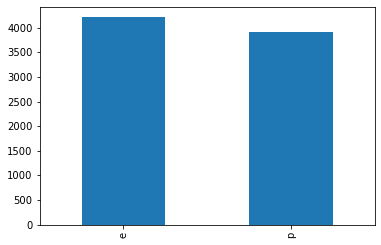

In [7]:
df['class'].value_counts().plot(kind='bar')

Data is more or less balanced. and class is the dependant variable

Since there is no missing data, we will first convert all data to numeric data 

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [15]:
X = df.iloc[:,1:]#selecting all rows and columns from 1st till last

In [16]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [17]:
y = df.iloc[:,0]

In [18]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

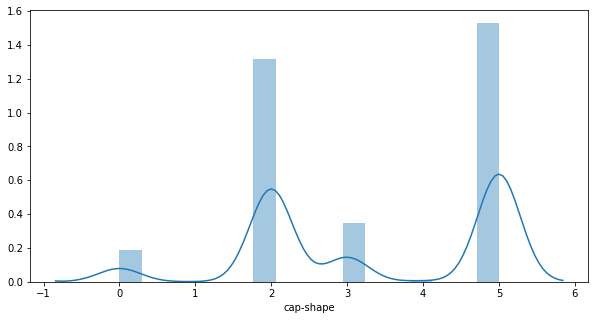

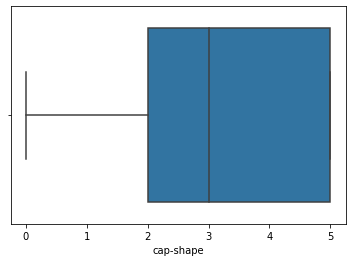

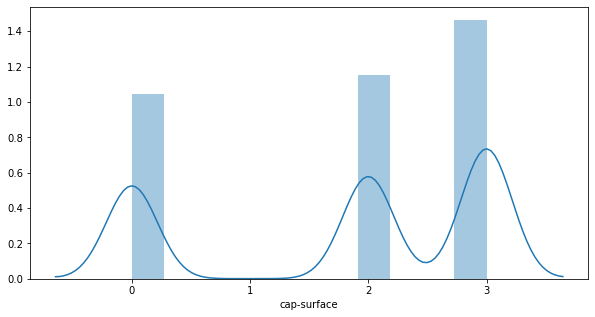

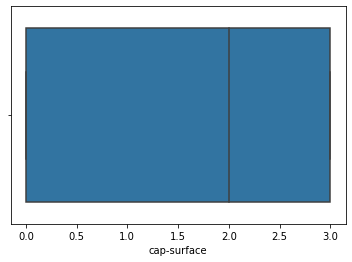

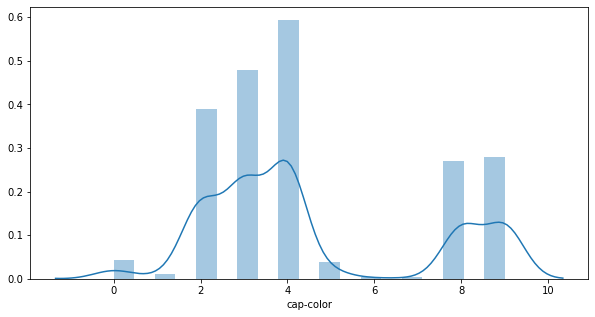

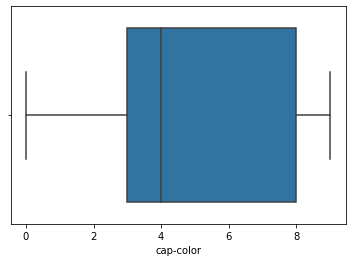

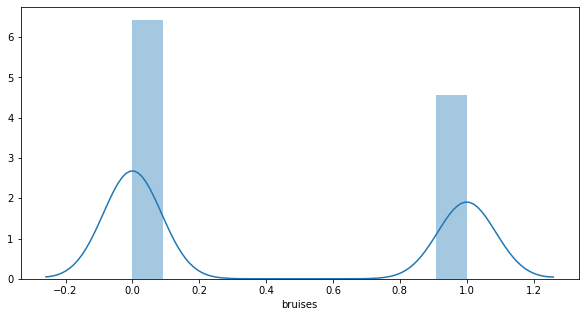

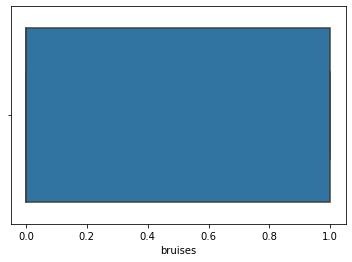

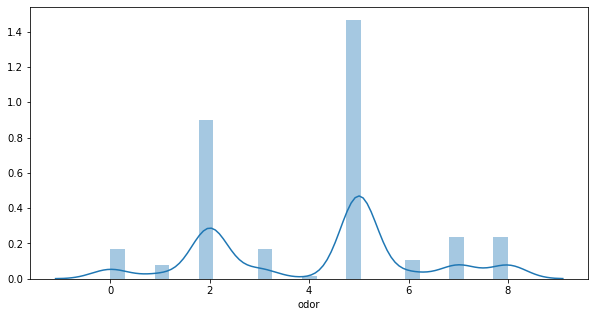

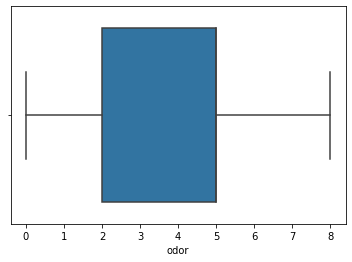

C:\Users\sp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


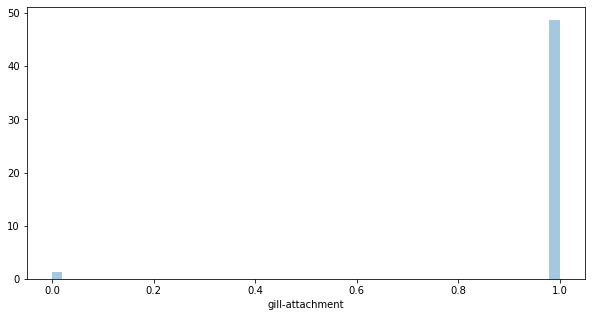

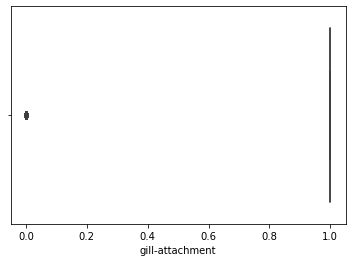

C:\Users\sp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


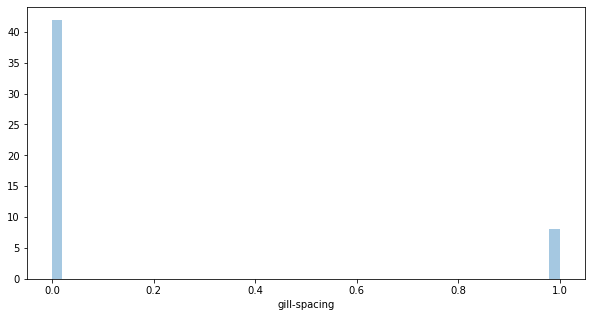

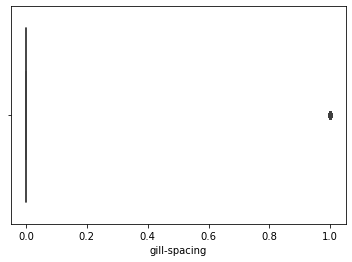

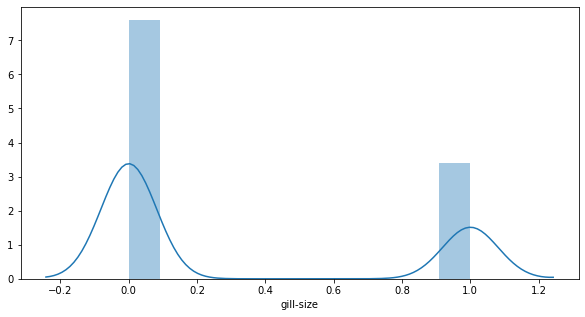

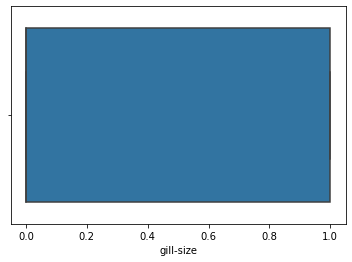

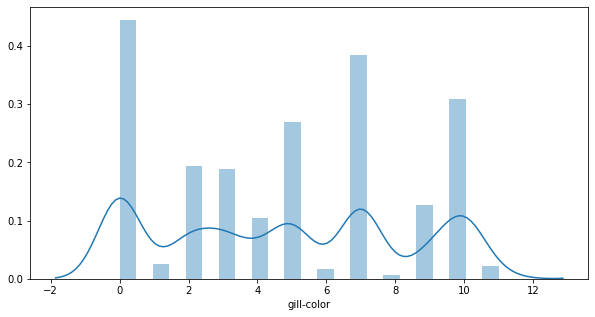

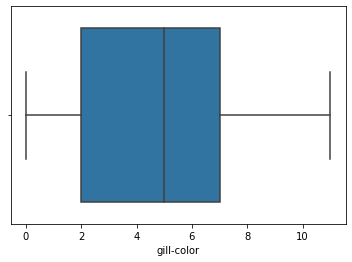

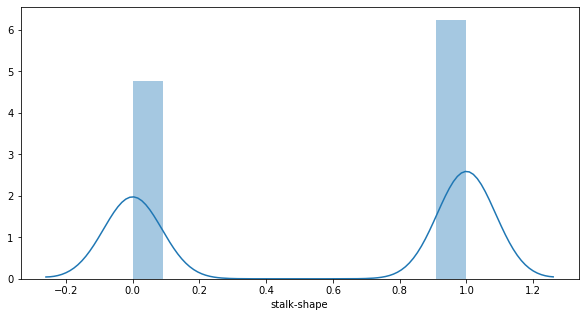

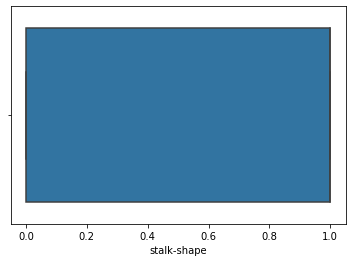

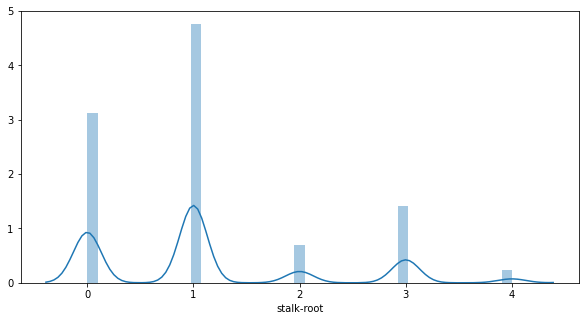

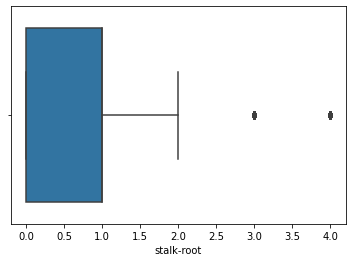

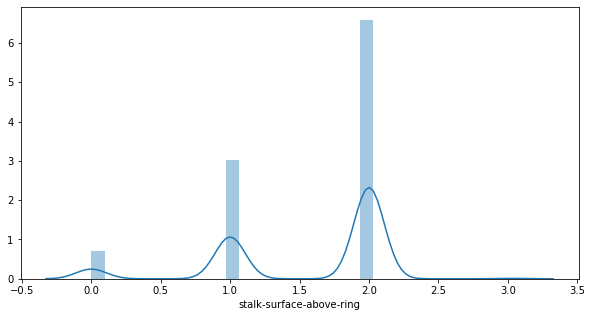

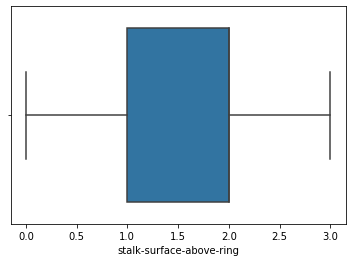

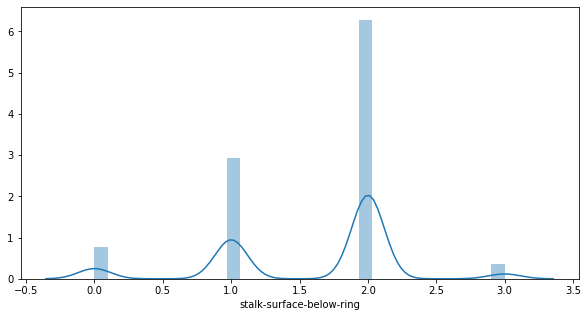

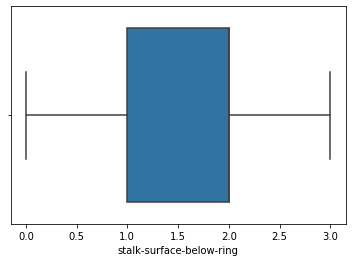

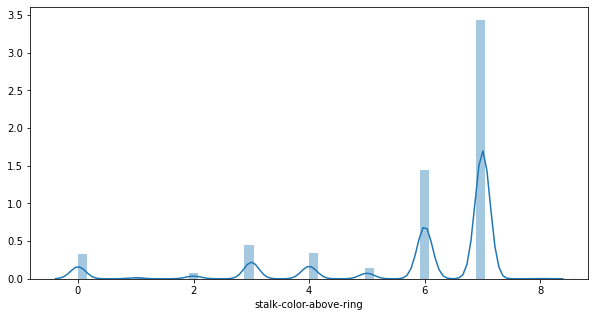

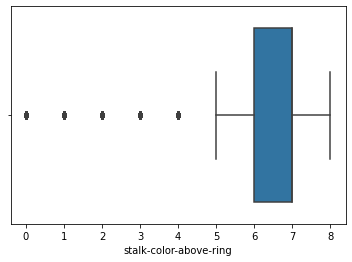

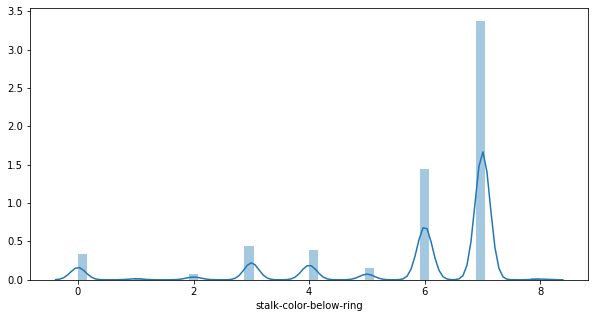

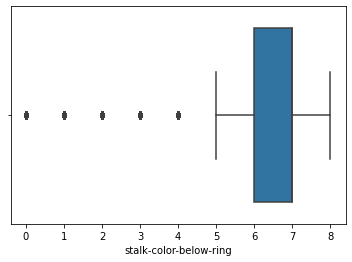

C:\Users\sp\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


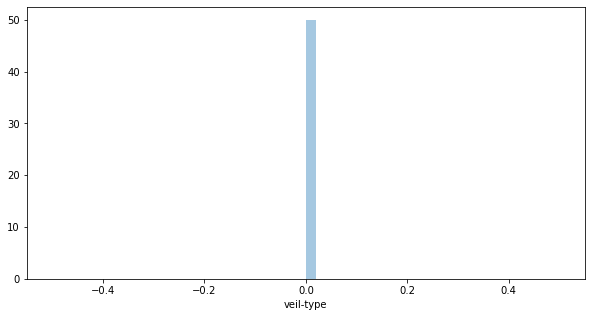

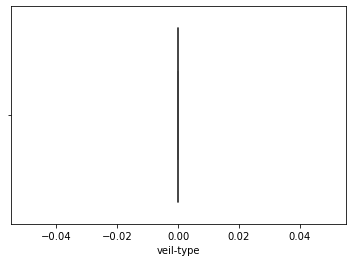

C:\Users\sp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


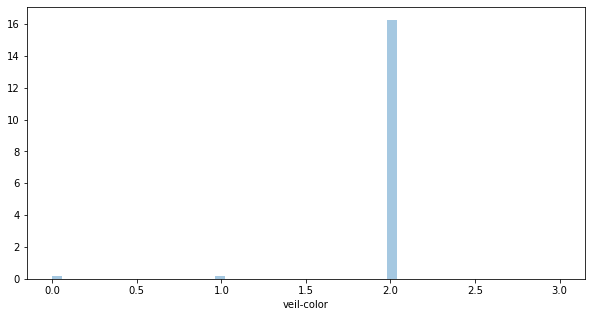

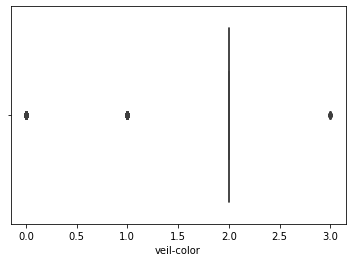

C:\Users\sp\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


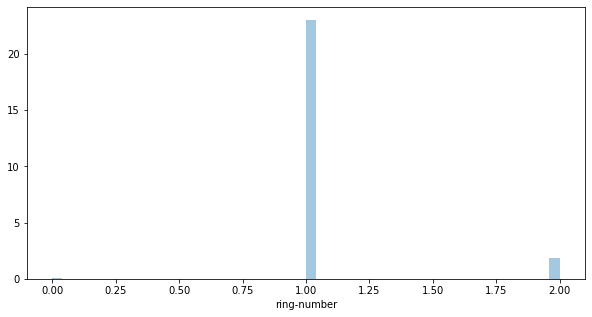

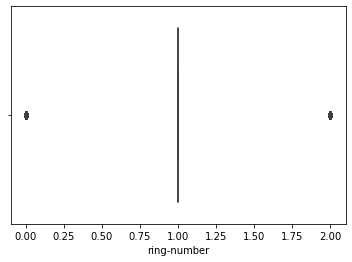

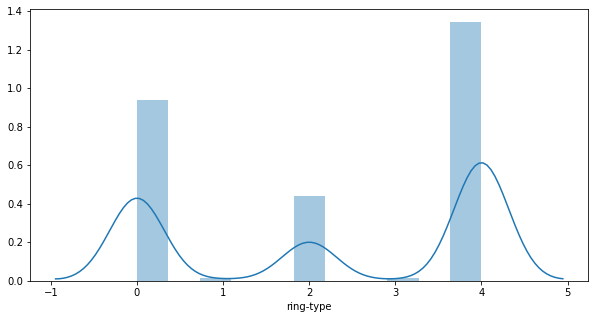

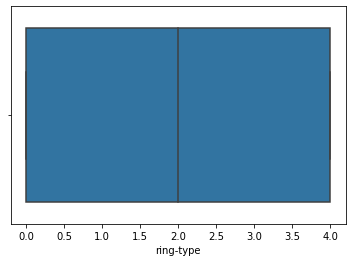

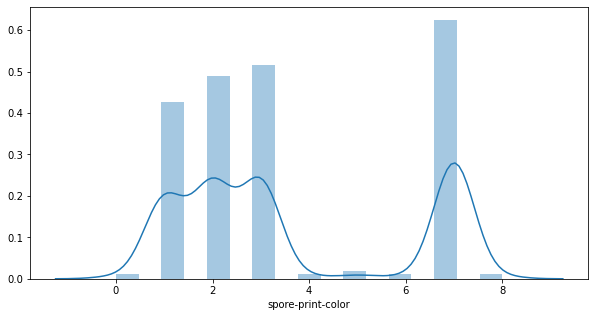

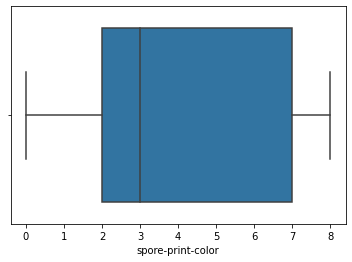

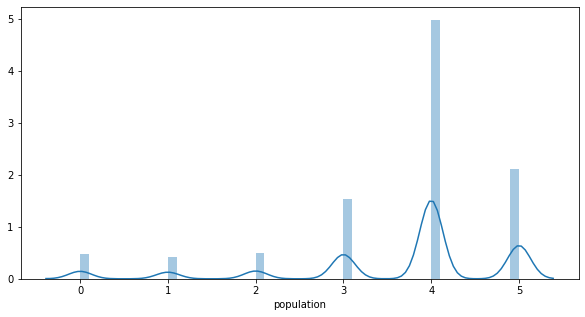

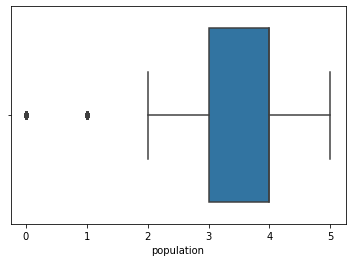

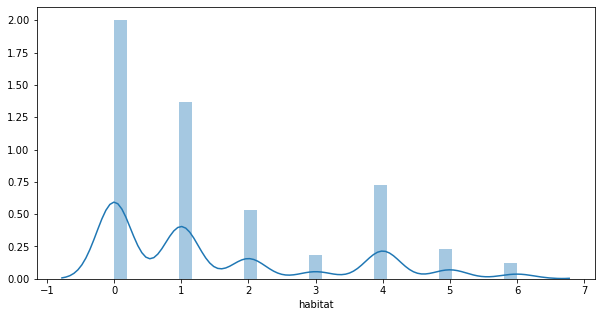

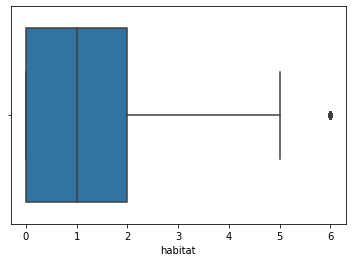

In [24]:
for i in X.columns:
    plt.figure(figsize=(10,5))
    sns.distplot(X[i])
    plt.show()
    sns.boxplot(X[i])
    plt.show()

As we can see from distributions, the data is not continuous and hence there are multimodal distributions

In [25]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

###### Principal component Analysis

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-5.74321902e-01, -9.75781349e-01, -1.22176154e+00, ...,
        -2.08581362e-01,  8.13996758e-03, -1.11186628e-18],
       [-2.28210230e+00,  2.79066333e-01, -1.20049669e+00, ...,
         1.52238789e-01, -1.96446132e-01,  3.04117333e-18],
       [-1.85803562e+00, -2.70972362e-01, -1.37237069e+00, ...,
         2.57581784e-01, -3.62577199e-01,  1.34910107e-18],
       ...,
       [-1.62151632e+00, -7.57536709e-01,  2.73357994e+00, ...,
        -1.42532241e+00,  6.36990122e-01,  4.89864643e-20],
       [ 3.67060561e+00, -1.03277450e+00,  1.68459501e-01, ...,
         9.41440123e-02, -6.43462238e-02, -2.78283493e-21],
       [-1.57520272e+00, -1.22858140e+00,  2.44722789e+00, ...,
        -8.04626064e-01,  5.90315263e-01,  5.19441712e-21]])

In [28]:
covariance = pca.get_covariance()
covariance

array([[ 1.00012311e+00, -5.04598689e-02, -4.82087723e-02,
        -3.53784857e-02, -2.19379500e-02,  7.88747759e-02,
         1.31976727e-02,  5.40569473e-02, -6.03950664e-03,
         6.38020697e-02,  3.01947722e-02, -3.04209144e-02,
        -3.25951166e-02, -3.16631918e-02, -3.03935589e-02,
         6.30298183e-19,  7.25693997e-02, -1.06546915e-01,
        -2.54597238e-02, -7.34245762e-02,  6.34209571e-02,
        -4.22261061e-02],
       [-5.04598689e-02,  1.00012311e+00, -1.94041011e-02,
         7.02370673e-02,  4.52388718e-02, -3.41840973e-02,
        -2.82340541e-01,  2.08125459e-01, -1.61037318e-01,
        -1.41243642e-02, -1.26260048e-01,  8.91013054e-02,
         1.07977800e-01,  6.60584116e-02,  6.88933788e-02,
        -3.95985387e-16, -1.66054596e-02, -2.61503505e-02,
        -1.06420046e-01,  2.30392413e-01,  2.15577812e-02,
         1.63906824e-01],
       [-4.82087723e-02, -1.94041011e-02,  1.00012311e+00,
        -7.64543349e-04, -3.87168603e-01,  4.14406892e-02,
    

In [29]:
explained_variance = pca.explained_variance_
explained_variance

array([3.87410924e+00, 2.60339434e+00, 2.40073834e+00, 2.16674719e+00,
       1.70303181e+00, 1.39495575e+00, 9.78803667e-01, 9.51936841e-01,
       7.70036405e-01, 7.11748353e-01, 5.77556532e-01, 5.42484855e-01,
       5.09631267e-01, 4.77214086e-01, 3.84467203e-01, 3.11228233e-01,
       2.18649656e-01, 1.59514884e-01, 1.31521687e-01, 7.31993474e-02,
       6.16155691e-02, 3.85578862e-36])

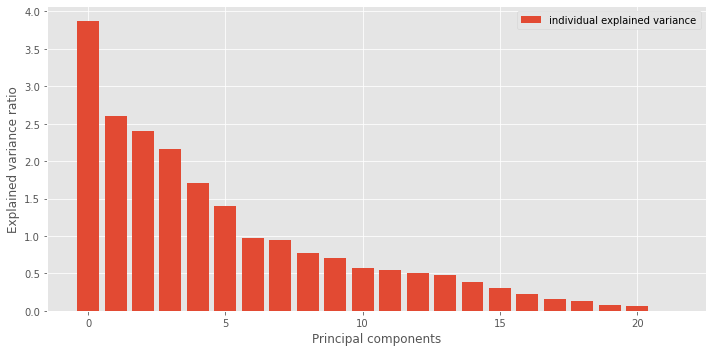

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.bar(range(22), explained_variance, align='center', label = 'individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()



We can see that the last 4 components has less amount of variance of the data.The 1st 17 components retains more than 90% of the data.


Let us take only first two principal components and visualise it using K-means clustering

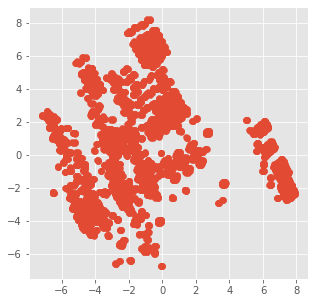

In [53]:
N = df.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize=(5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

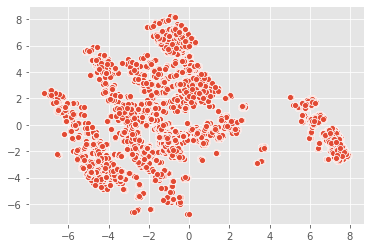

In [61]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)
sns.scatterplot(x[:,0], x[:,1] )

Thus using K-means we are able segregate 2 classes well using the first two components with maximum variance.

Performing PCA by taking 17 components with maximum Variance

In [62]:
pca_modified = PCA(n_components=17)
pca_modified.fit_transform(X)

array([[-0.5743219 , -0.97578135, -1.22176154, ..., -0.51996599,
        -0.78254366,  1.12025933],
       [-2.2821023 ,  0.27906633, -1.20049669, ..., -0.11307822,
        -0.73093408, -0.01817413],
       [-1.85803562, -0.27097236, -1.37237069, ...,  0.01652548,
        -0.6561675 ,  0.10791396],
       ...,
       [-1.62151632, -0.75753671,  2.73357994, ..., -0.51961303,
        -0.70768708,  0.22578534],
       [ 3.67060561, -1.0327745 ,  0.1684595 , ..., -0.08688401,
        -0.11464249, -0.14801392],
       [-1.57520272, -1.2285814 ,  2.44722789, ...,  0.91606764,
        -0.77988482, -0.30141893]])

Splitting the data into training and testing dataset

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

###### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model_LR=LogisticRegression()
model_LR.fit(X_train, y_train)
y_prob = model_LR.predict_proba(X_test)[:,1] #gives positive class prediction probabilities
y_pred = np.where(y_prob > 0.5, 1, 0)#This will threshold the probabilities to give class predictions
model_LR.score(X_test, y_pred)

1.0

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, recall_score, f1_score, precision_score, roc_auc_score
predictions = model_LR.predict(X_test)


In [73]:

print(accuracy_score(y_test, predictions))
print(classification_report(predictions, y_test))
print(roc_auc_score(predictions, y_test))
print(recall_score(predictions, y_test))
print(precision_score(predictions, y_test))
print(f1_score(predictions, y_test))
print(confusion_matrix(y_test, predictions))

0.9593846153846154
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       851
           1       0.95      0.96      0.96       774

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

0.9594685686697819
0.9612403100775194
0.9538461538461539
0.9575289575289576
[[815  30]
 [ 36 744]]


In [75]:
FPR, TPR, thresholds = roc_curve(y_test, predictions)
print(FPR)
print(TPR)
print(thresholds)

[0.         0.03550296 1.        ]
[0.         0.95384615 1.        ]
[2 1 0]


In [78]:
from sklearn.metrics import auc

In [79]:
roc_auc = auc(FPR, TPR)
roc_auc

0.9591715976331362

Text(0.5, 0, 'False Positive Rate')

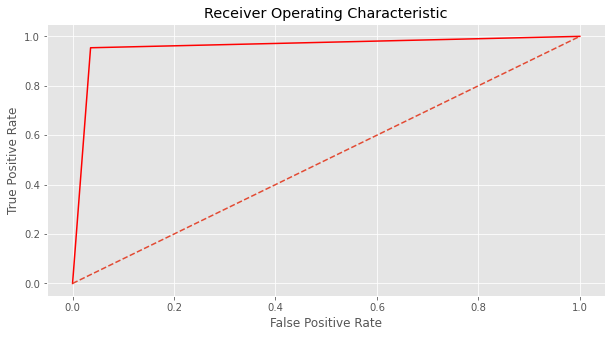

In [84]:
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic')
plt.plot(FPR, TPR, color='red' )
plt.plot([0,1],[0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

###### Logistic Regression(Tuned)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression(C=100, max_iter=350)



L1 and L2 are regularization parameters.They're used to avoid overfiting.Both L1 and L2 regularization prevents overfitting by shrinking (imposing a penalty) on the coefficients.

L1 is the first moment norm |x1-x2| (|w| for regularization case) that is simply the absolute dıstance between two points where L2 is second moment norm corresponding to Eucledian Distance that is |x1-x2|^2 (|w|^2 for regularization case).

In simple words,L2 (Ridge) shrinks all the coefficient by the same proportions but eliminates none, while L1 (Lasso) can shrink some coefficients to zero, performing variable selection.

If all the features are correlated with the label, ridge outperforms lasso, as the coefficients are never zero in ridge. If only a subset of features are correlated with the label, lasso outperforms ridge as in lasso model some coefficient can be shrunken to zero.


In [93]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [110]:
LR_model.fit(X_train, y_train)
ypred = LR_model.predict(X_test)
print(accuracy_score(y_test, ypred))
print(classification_report(ypred, y_test))
print(roc_auc_score(ypred, y_test))
print(recall_score(ypred, y_test))
print(precision_score(ypred, y_test))
print(f1_score(ypred, y_test))
print(confusion_matrix(y_test, ypred))

0.9729230769230769
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       847
           1       0.97      0.97      0.97       778

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

0.9729265242819811
0.9730077120822622
0.9705128205128205
0.9717586649550707
[[824  21]
 [ 23 757]]


0.9728303747534518


Text(0.5, 0, 'False Positive Rate with tuned')

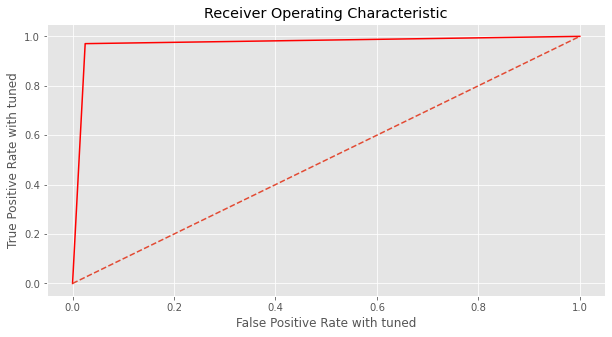

In [111]:
FPR1, TPR1, thresholds1 = roc_curve(y_test, ypred)

roc_auc = auc(FPR1, TPR1)
print(roc_auc)
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic')
plt.plot(FPR1, TPR1, color='red' )
plt.plot([0,1],[0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate with tuned')
plt.xlabel('False Positive Rate with tuned')

In [112]:
LR_ridge= LogisticRegression(penalty='l2')
LR_ridge.fit(X_train,y_train)

LogisticRegression()

In [113]:


y_prob = LR_ridge.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR_ridge.score(X_test, y_pred)



1.0

In [114]:


confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix



array([[815,  30],
       [ 36, 744]], dtype=int64)

In [116]:


auc_roc=print(classification_report(y_test,y_pred))
auc_roc



              precision    recall  f1-score   support

           0       0.96      0.96      0.96       845
           1       0.96      0.95      0.96       780

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [117]:


from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc



0.9903474434835382

Text(0.5, 0, 'False Positive Rate')

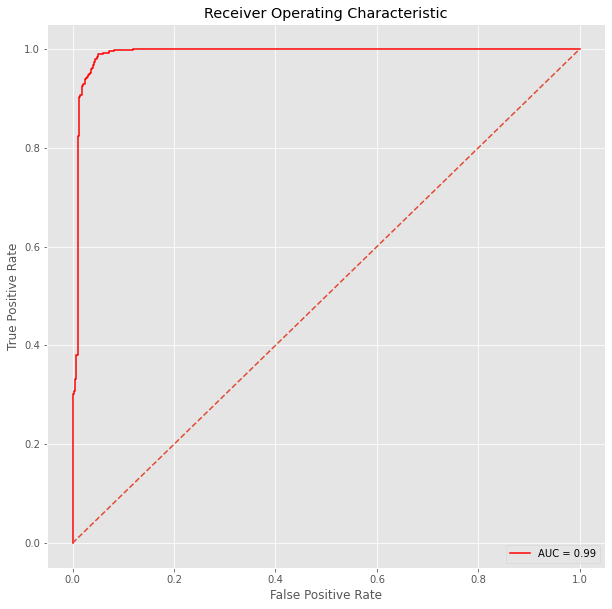

In [118]:


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



###### Gaussian Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)
y_prob = model_naive.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_naive.score(X_test, y_pred)
print("Number of mislabeled points from %d points : %d"
      % (X_test.shape[0],(y_test!= y_pred).sum()))
scores = cross_val_score(model_naive, X, y, cv=10, scoring='accuracy')
print(scores)

Number of mislabeled points from 1625 points : 111
[0.59778598 0.78843788 0.97908979 0.9803198  0.84852217 0.81773399
 0.8091133  0.81650246 0.85098522 0.97536946]


In [120]:
scores.mean()

0.8463860057319785

In [121]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[786,  59],
       [ 52, 728]], dtype=int64)

In [123]:
auc_roc=print(metrics.classification_report(y_test,y_pred))
auc_roc

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       845
           1       0.93      0.93      0.93       780

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625



In [124]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9592201486876043

Text(0.5, 0, 'False Positive Rate')

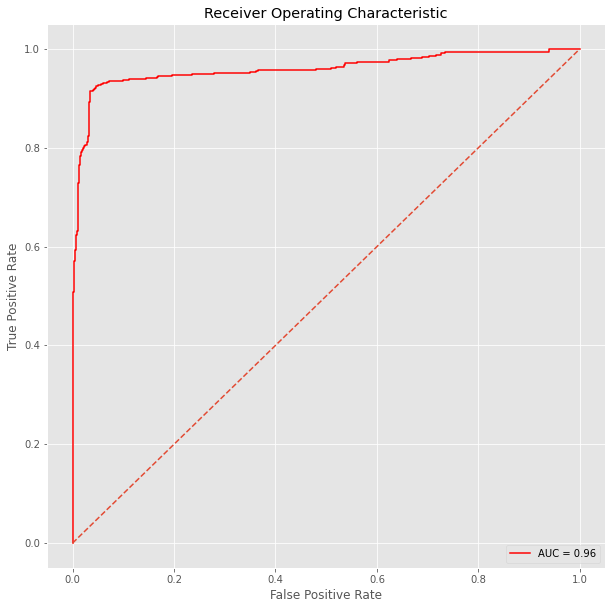

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

###### Support Vector Machine

In [126]:
from sklearn.svm import SVC
svm_model= SVC()



The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.


###### Support Vector Machine without polynomial kernel

In [127]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 #'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the tuned_parameter**.The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained. But it is proving computationally expensive here.So I am opting for RandomizedSearchCV.

RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search: 1)A budget can be chosen independent of the number of parameters and possible values. 2)Adding parameters that do not influence the performance does not decrease efficiency.

In [130]:
from sklearn.model_selection import RandomizedSearchCV

model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [131]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

1.0


In [134]:
print(model_svm.best_score_)

1.0


In [135]:
print(model_svm.best_params_)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}


In [136]:


y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))



1.0


In [137]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

In [138]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [139]:


auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc



1.0

In [140]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

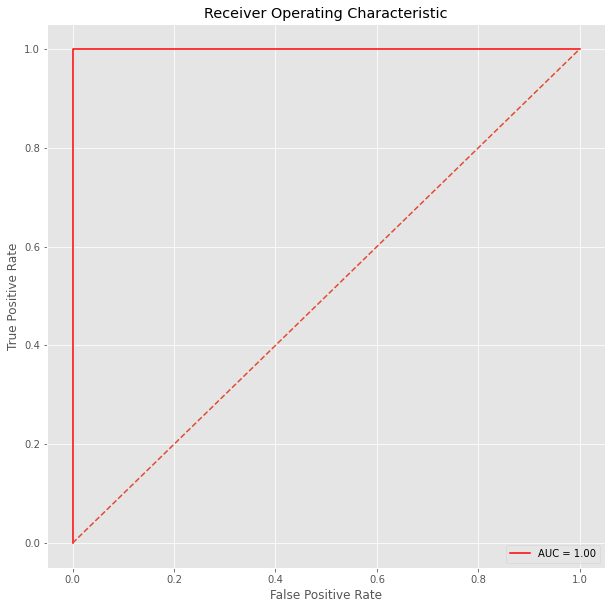

In [141]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

###### Support Vector machine with polynomial Kernel

In [142]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

In [143]:
model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [144]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

1.0


In [145]:


print(model_svm.best_params_)



{'kernel': 'poly', 'gamma': 1, 'degree': 6, 'C': 1000}


In [146]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [147]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

In [148]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       845\n           1       1.00      1.00      1.00       780\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [149]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [150]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

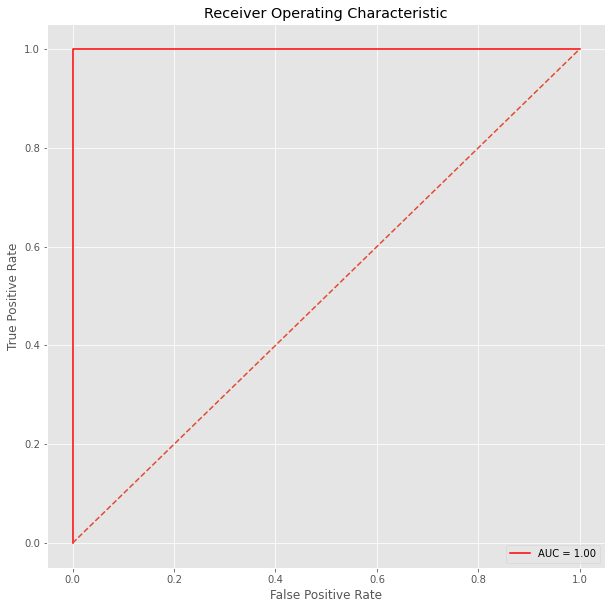

In [151]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

###### Random Forest Classifier

In [152]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(5,10,5), 'n_estimators' : range(50,200,50),
                    'max_depth': range(5,15,5), 'max_features':range(5,20,5)
                    }

model_RR.fit(X_train,y_train)

y_prob = model_RR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
print(model_RR.score(X_test, y_pred))

1.0


In [156]:


confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix



array([[845,   0],
       [  0, 780]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

1.0


Text(0.5, 0, 'False Positive Rate')

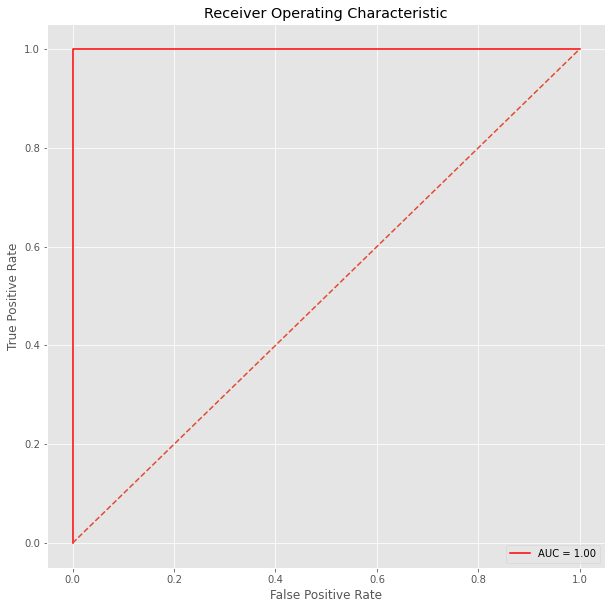

In [154]:
#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

###### Neural Networks

In [158]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

In [159]:
mlp = MLPClassifier()
perceptron = Perceptron()

In [161]:
mlp.fit(X_train, y_train)

MLPClassifier()

In [162]:

perceptron.fit(X_train, y_train)

Perceptron()

In [163]:
y_prob = mlp.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)

1.0

In [165]:
y_pred1 = perceptron.predict(X_test) # This will give you positive class prediction probabilities  
perceptron.score(X_test, y_pred1)

1.0

In [166]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

In [167]:
confusion_matrix1=metrics.confusion_matrix(y_test,y_pred1)
confusion_matrix1

array([[770,  75],
       [ 80, 700]], dtype=int64)

In [169]:
auc_roc=print(metrics.classification_report(y_test,y_pred))
auc_roc

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [173]:
auc_roc=print(metrics.classification_report(y_test,y_pred1))
auc_roc

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       845
           1       0.90      0.90      0.90       780

    accuracy                           0.90      1625
   macro avg       0.90      0.90      0.90      1625
weighted avg       0.90      0.90      0.90      1625



In [175]:


from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)




from sklearn.metrics import roc_curve, auc
false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_test, y_pred1)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
print(roc_auc)



1.0
1.0


Text(0.5, 0, 'False Positive Rate')

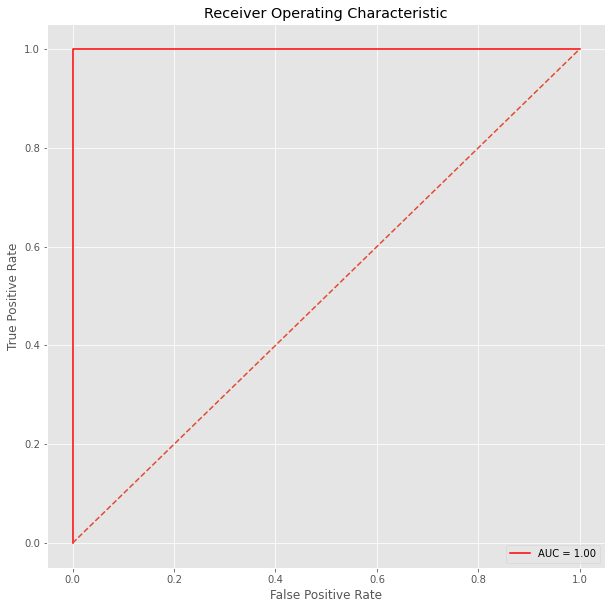

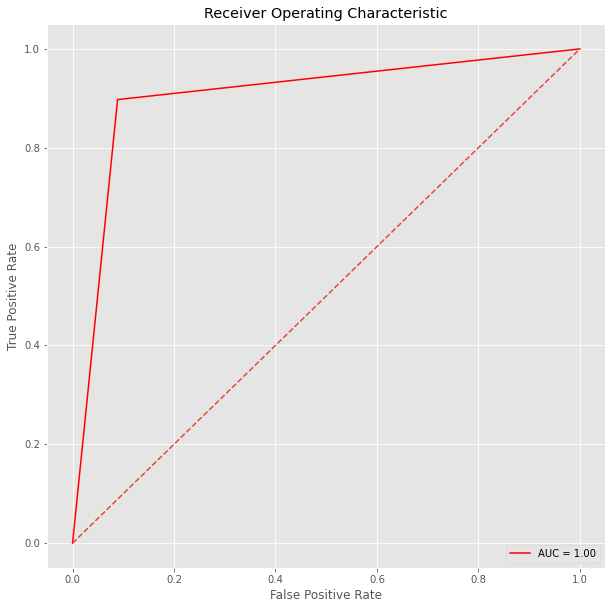

In [176]:


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')




import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1,true_positive_rate1, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Conclusion: As indicated, on this dataset several of our models are performing well.